In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

In [9]:
df_train = pd.read_csv('train.csv')

In [10]:
df_test = pd.read_csv('test.csv')

In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
x_train = df_train['']
y_train = df_train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df_train.drop(columns='Cabin', inplace=True)

In [22]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

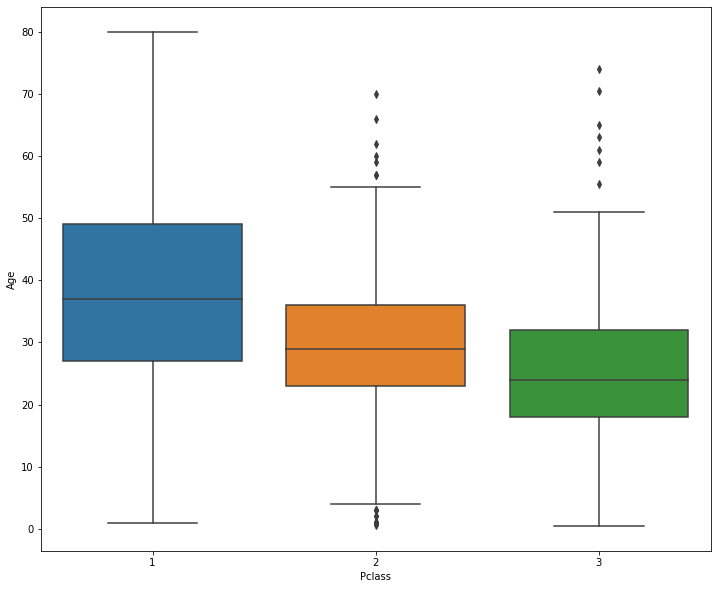

In [26]:
plt.figure(figsize=(12,10))
sns.boxplot(data= df_train, x='Pclass', y='Age')

In [28]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass ==3:
            return 22
    else:
        return Age
        

In [30]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [31]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [38]:
df_train.dropna(inplace=True)

In [39]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
df_train['Pclass'] = pd.get_dummies(df_train['Pclass'], drop_first= True)

In [46]:
df

0    705
1    184
Name: Pclass, dtype: int64

In [47]:
df_train['Sex'] = pd.get_dummies(df_train['Sex'], drop_first= True)

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [56]:
df_train['Embarked'].value_counts()

0    812
1     77
Name: Embarked, dtype: int64

In [50]:
df_train['Embarked'] = pd.get_dummies(df_train['Embarked'], drop_first= True)

In [51]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [59]:
df_train.drop(['Name','PassengerId','Ticket'], axis=1, inplace=True)

In [60]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,1,22.0,1,0,7.2500,0
1,1,0,0,38.0,1,0,71.2833,0
2,1,0,0,26.0,0,0,7.9250,0
3,1,0,0,35.0,1,0,53.1000,0
4,0,0,1,35.0,0,0,8.0500,0


In [61]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [62]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
df_test.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1, inplace=True)

In [65]:
df_test['Age'] = df_test[['Age', 'Pclass']].apply(impute_age, axis=1)

In [67]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [68]:
df_test['Fare'].mean()

35.6271884892086

In [69]:
df_test['Fare'] = df_test['Fare'].fillna(35.62)

In [70]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [71]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [80]:
df_test['Pclass'] = pd.get_dummies(df_test['Pclass'],drop_first=True)

In [81]:
df_test['Sex'] = pd.get_dummies(df_test['Sex'], drop_first=True)

In [82]:
df_test['Embarked'] = pd.get_dummies(df_test['Embarked'], drop_first=True)

In [72]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [73]:
X_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]
y_train = df_train['Survived']

In [74]:
ac = AdaBoostClassifier()

In [75]:
ac.fit(X_train, y_train)

AdaBoostClassifier()

In [83]:
pred = ac.predict(df_test)

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
X = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]
y = df_train['Survived']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [88]:
ac.fit(X_train, y_train)

AdaBoostClassifier()

In [90]:
pred = ac.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [92]:
print(confusion_matrix(y_test, pred))

[[133  24]
 [ 40  70]]


In [93]:
print(accuracy_score(y_test,pred))

0.7602996254681648


In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       157
           1       0.74      0.64      0.69       110

    accuracy                           0.76       267
   macro avg       0.76      0.74      0.75       267
weighted avg       0.76      0.76      0.76       267



In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lm = LogisticRegression()

In [98]:
lm.fit(X_train, y_train)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
pred = lm.predict(X_test)

In [100]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       185
           1       0.57      0.77      0.66        82

    accuracy                           0.75       267
   macro avg       0.73      0.76      0.73       267
weighted avg       0.78      0.75      0.76       267



In [101]:
print(accuracy_score(y_test, pred))

0.7528089887640449
